# Projeto 2° Bimestre Modelagem Estatística

## Tema: Predição e Classificação de Preços de Imóveis

---

## 1. Introdução

A análise de dados aplicada ao mercado imobiliário tem grande importância para a tomada de decisões estratégicas, tanto para compradores quanto para investidores e construtoras. A partir de variáveis como área do imóvel, número de quartos, banheiros e vagas de garagem, é possível estimar o valor de mercado de uma residência e também classificá-la em diferentes faixas de preço.

Neste projeto, são aplicadas técnicas de análise exploratória de dados, modelagem estatística e algoritmos de aprendizado de máquina para resolver problemas de regressão e classificação utilizando um conjunto de dados reais do mercado imobiliário. O estudo contempla desde a investigação das relações entre as variáveis até a avaliação, comparação e otimização dos modelos propostos.

Serão utilizados algoritmos de regressão linear (simples, múltipla e polinomial), bem como algoritmos de classificação (Naive Bayes e Regressão Logística), com avaliação por métricas apropriadas e otimização por validação cruzada e ajuste de hiperparâmetros.

---

## 2. Objetivos

### 2.1 Objetivo Geral

Aplicar técnicas de modelagem estatística e aprendizado de máquina para prever e classificar preços de imóveis a partir de suas características físicas, avaliando o desempenho e a robustez dos modelos gerados.

### 2.2 Objetivos Específicos

* Realizar a análise exploratória dos dados (EDA), identificando padrões, correlações, valores ausentes e possíveis outliers;
* Implementar modelos de regressão linear simples, múltipla e polinomial para predição do preço dos imóveis;
* Implementar os modelos de classificação Naive Bayes e Regressão Logística para categorização dos imóveis em faixas de preço;
* Avaliar o desempenho dos modelos de regressão por meio das métricas MAE, RMSE e R²;
* Avaliar os modelos de classificação por meio das métricas accuracy, precision, recall, F1-score e AUC-ROC;
* Aplicar técnicas de validação cruzada e otimização dos modelos;
* Analisar as limitações, possíveis vieses e propor melhorias futuras.

---

## 3. Descrição do Dataset

O conjunto de dados utilizado neste projeto é um dataset público sobre preços de imóveis residenciais, contendo informações estruturais das residências e seus respectivos valores de mercado. Cada linha do dataset representa um imóvel, e cada coluna descreve uma característica específica do mesmo.

As principais variáveis utilizadas no projeto são:

* `price` - Preço do imóvel (variável alvo da regressão);
* `area` - Área do imóvel em metros quadrados;
* `bedrooms` - Número de quartos;
* `bathrooms` - Número de banheiros;
* `parking` - Número de vagas de garagem;
* `stories` - Número de andares.

Para a etapa de classificação, o preço dos imóveis é transformado em uma variável categórica com três classes:

* `barato`
* `medio`
* `caro`

Essa classificação é obtida a partir da divisão dos preços em três quantis.

---

## 4. Fonte e Licença dos Dados

O dataset foi obtido por meio da plataforma **Kaggle**, que disponibiliza conjuntos de dados públicos para fins acadêmicos e de pesquisa.

* **Fonte:** [Kaggle - Housing / Real Estate Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)
* **Licença:** Uso livre para fins educacionais e de pesquisa, conforme os termos da plataforma Kaggle.

A utilização dos dados neste projeto respeita integralmente os princípios de ética, transparência e uso responsável da informação.

---

## 5. Hipóteses de Negócio

* Hipótese 1: Existe uma forte relação linear entre a área do imóvel e seu preço de mercado.
* Hipótese 2: O número de quartos, banheiros e vagas de garagem influencia significativamente o valor final do imóvel.
* Hipótese 3: É possível classificar os imóveis em categorias de preço (barato, médio e caro) a partir de suas características estruturais utilizando modelos de classificação supervisionada.

---


# Instalações, importações e leitura do dataset

In [10]:
#!pip install pandas seaborn scikit-learn statsmodels

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [12]:
df = pd.read_csv("/content/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Análise Exploratória (EDA)

A EDA permitiu entender as principais características do dataset e como as variáveis se relacionam com o preço dos imóveis.

- Distribuição: As variáveis numéricas apresentam assimetria natural do mercado imobiliário, com alguns valores muito altos (outliers), principalmente em price e area.

- Correlação: O heatmap mostra que area possui a maior correlação positiva com price, seguida por bedrooms, bathrooms e parking.

- Teste de Pearson: Todas as variáveis analisadas apresentam correlação estatisticamente significativa com o preço (p < 0.05).

- Dispersão: Os scatterplots confirmam uma relação crescente entre as variáveis estruturais e o preço, especialmente entre area e price.

Em geral, o dataset está limpo e consistente, e os padrões observados indicam que a regressão linear será adequada, com area sendo a principal variável preditora.

---

### INSIGHTS DA EDA:
1. A variável 'area' apresenta forte correlação positiva com 'price', indicando que imóveis maiores tendem a ser mais caros.
2. 'bedrooms', 'bathrooms' e 'parking' também apresentam correlação positiva, mas menos intensa que 'area'.
3. Alguns outliers podem existir em 'price' e 'area', que devem ser considerados ao ajustar modelos de regressão.
4. As distribuições das variáveis mostram que 'price' e 'area' são levemente assimétricas à direita, o que pode sugerir transformação logarítmica para regressão polinomial.
5. Nenhuma coluna possui valores ausentes, então não será necessário imputação de dados.
6. Baseado nas correlações e distribuição, podemos seguir com regressão linear simples (price ~ area) e múltipla (price ~ area + bedrooms + bathrooms + parking).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
Valores ausentes por coluna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad       

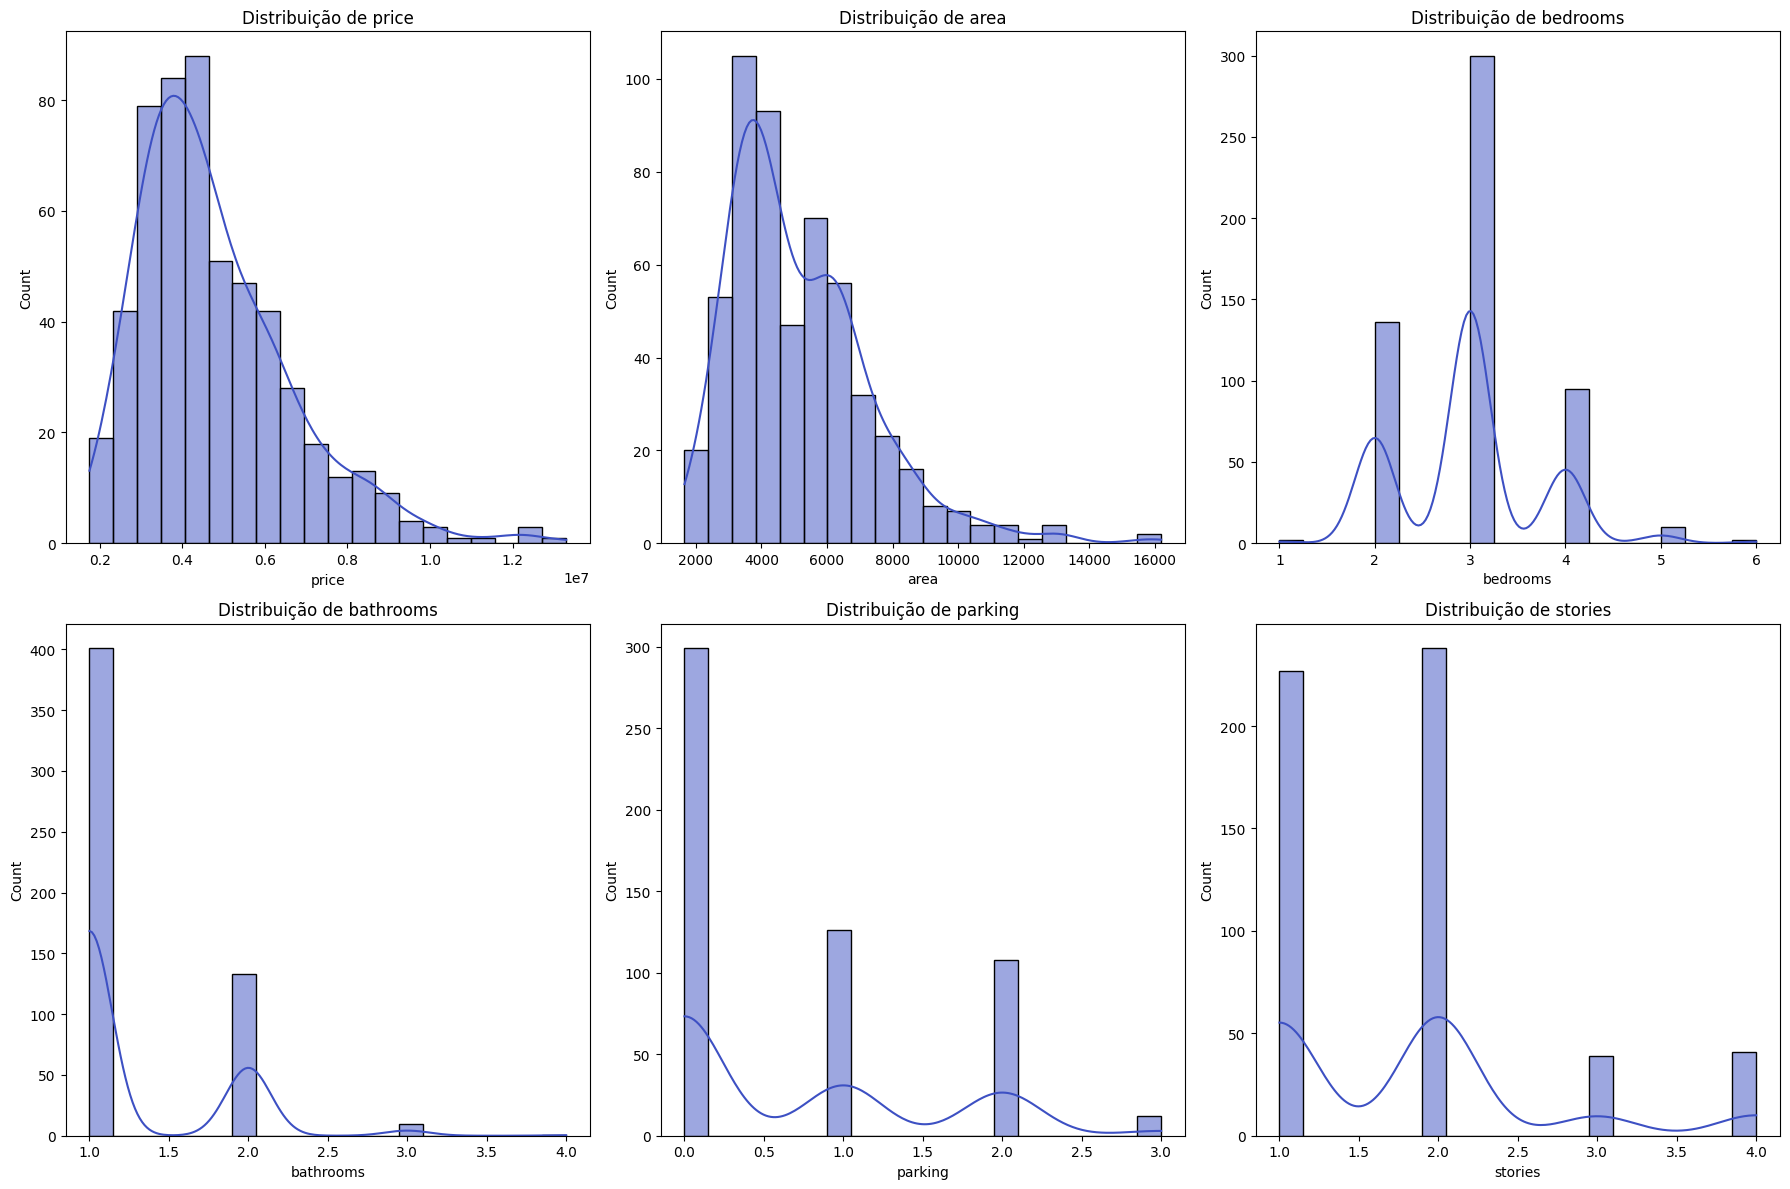

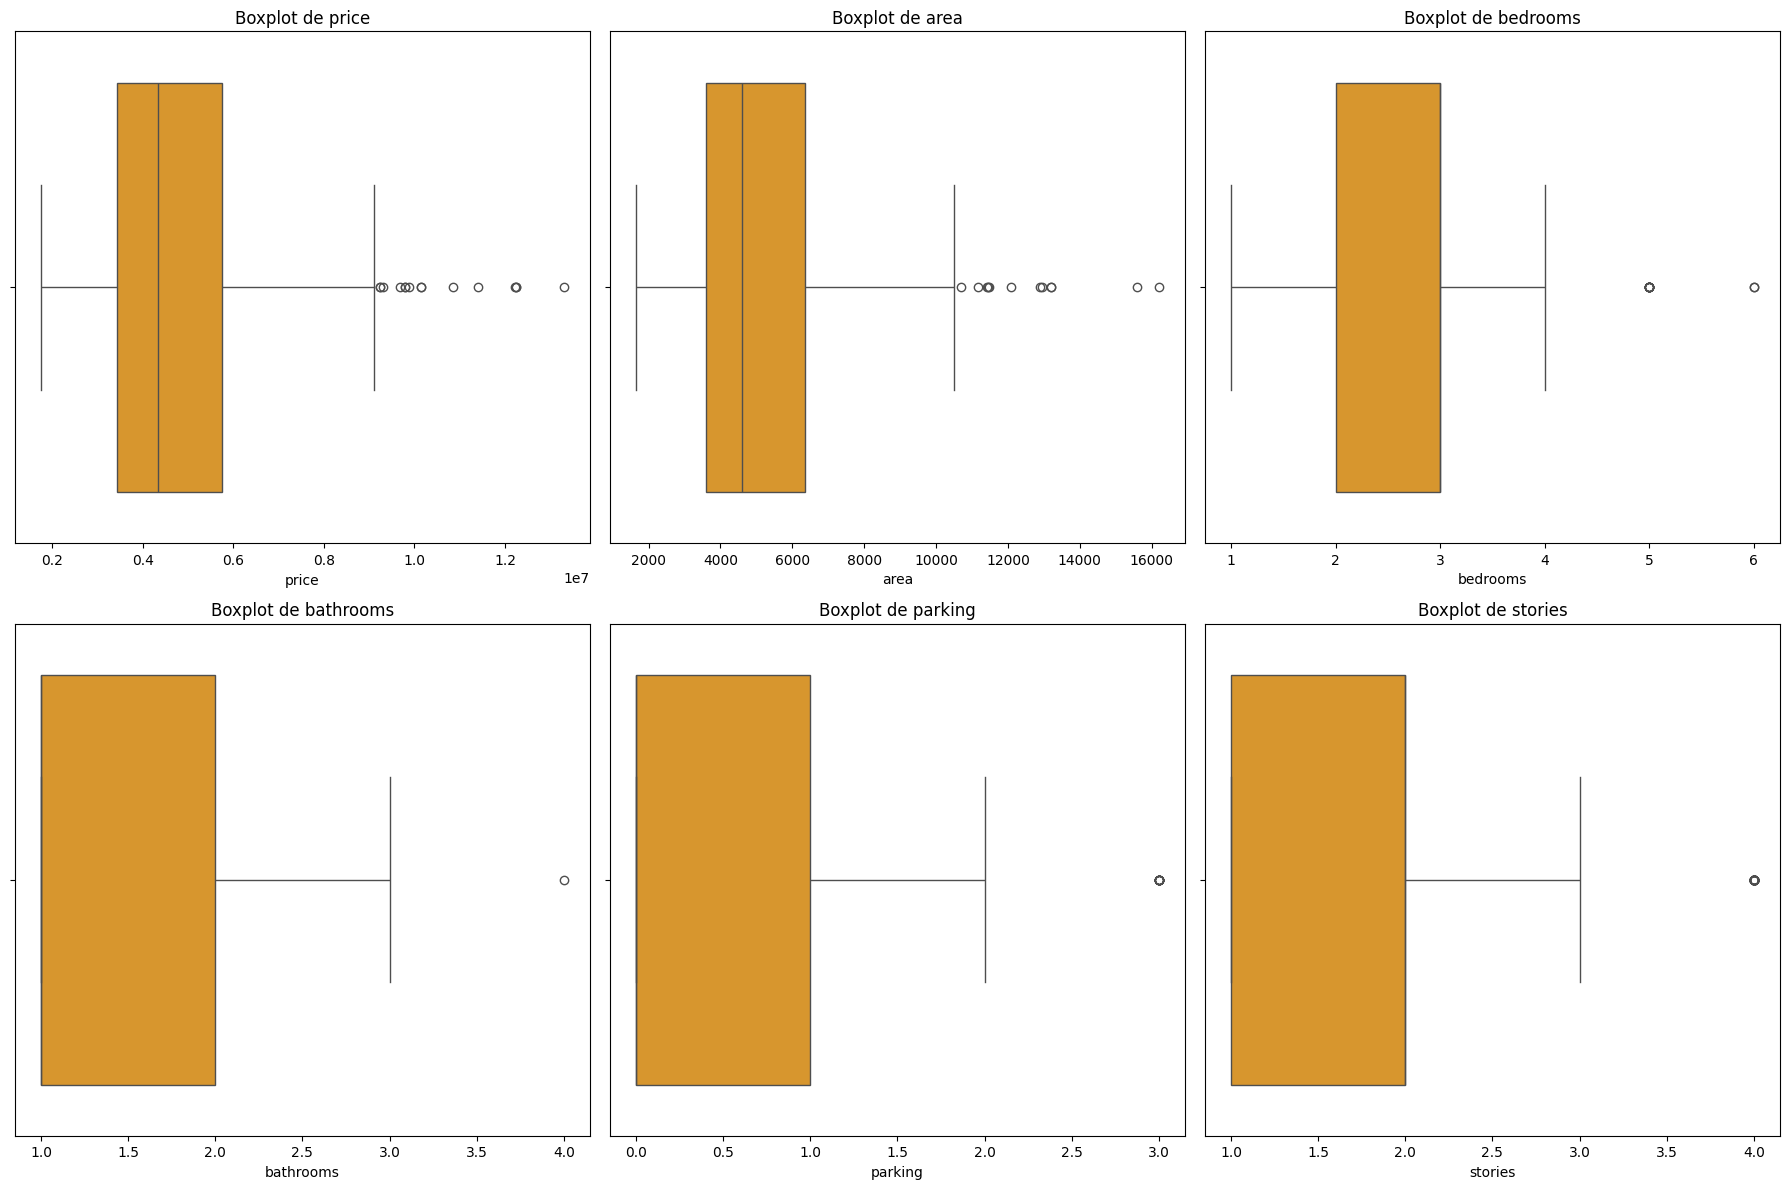

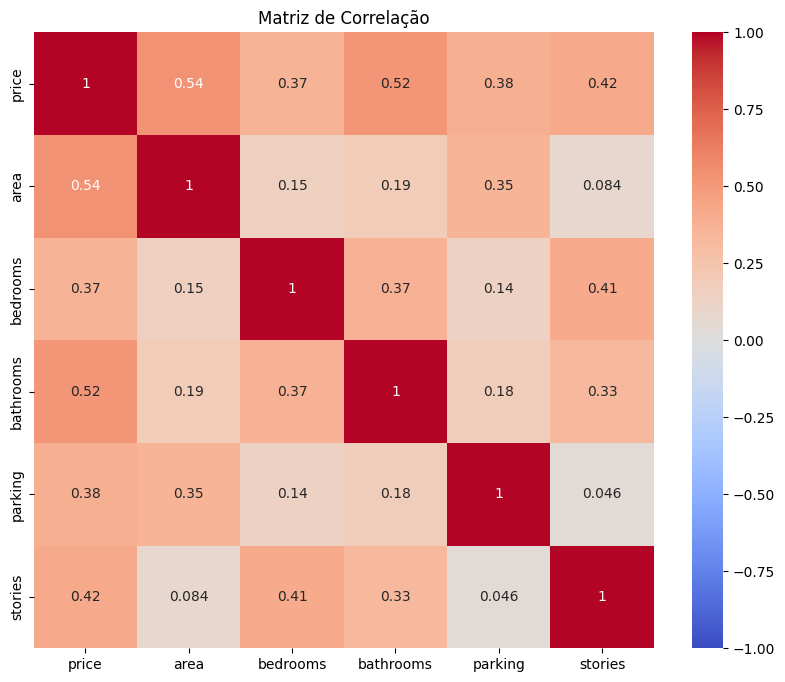

Teste de correlação de Pearson:
area vs price: r=0.536, p-valor=7.388e-42
-> Correlação significativa

bedrooms vs price: r=0.366, p-valor=9.080e-19
-> Correlação significativa

bathrooms vs price: r=0.518, p-valor=1.139e-38
-> Correlação significativa

parking vs price: r=0.384, p-valor=1.238e-20
-> Correlação significativa

stories vs price: r=0.421, p-valor=8.668e-25
-> Correlação significativa



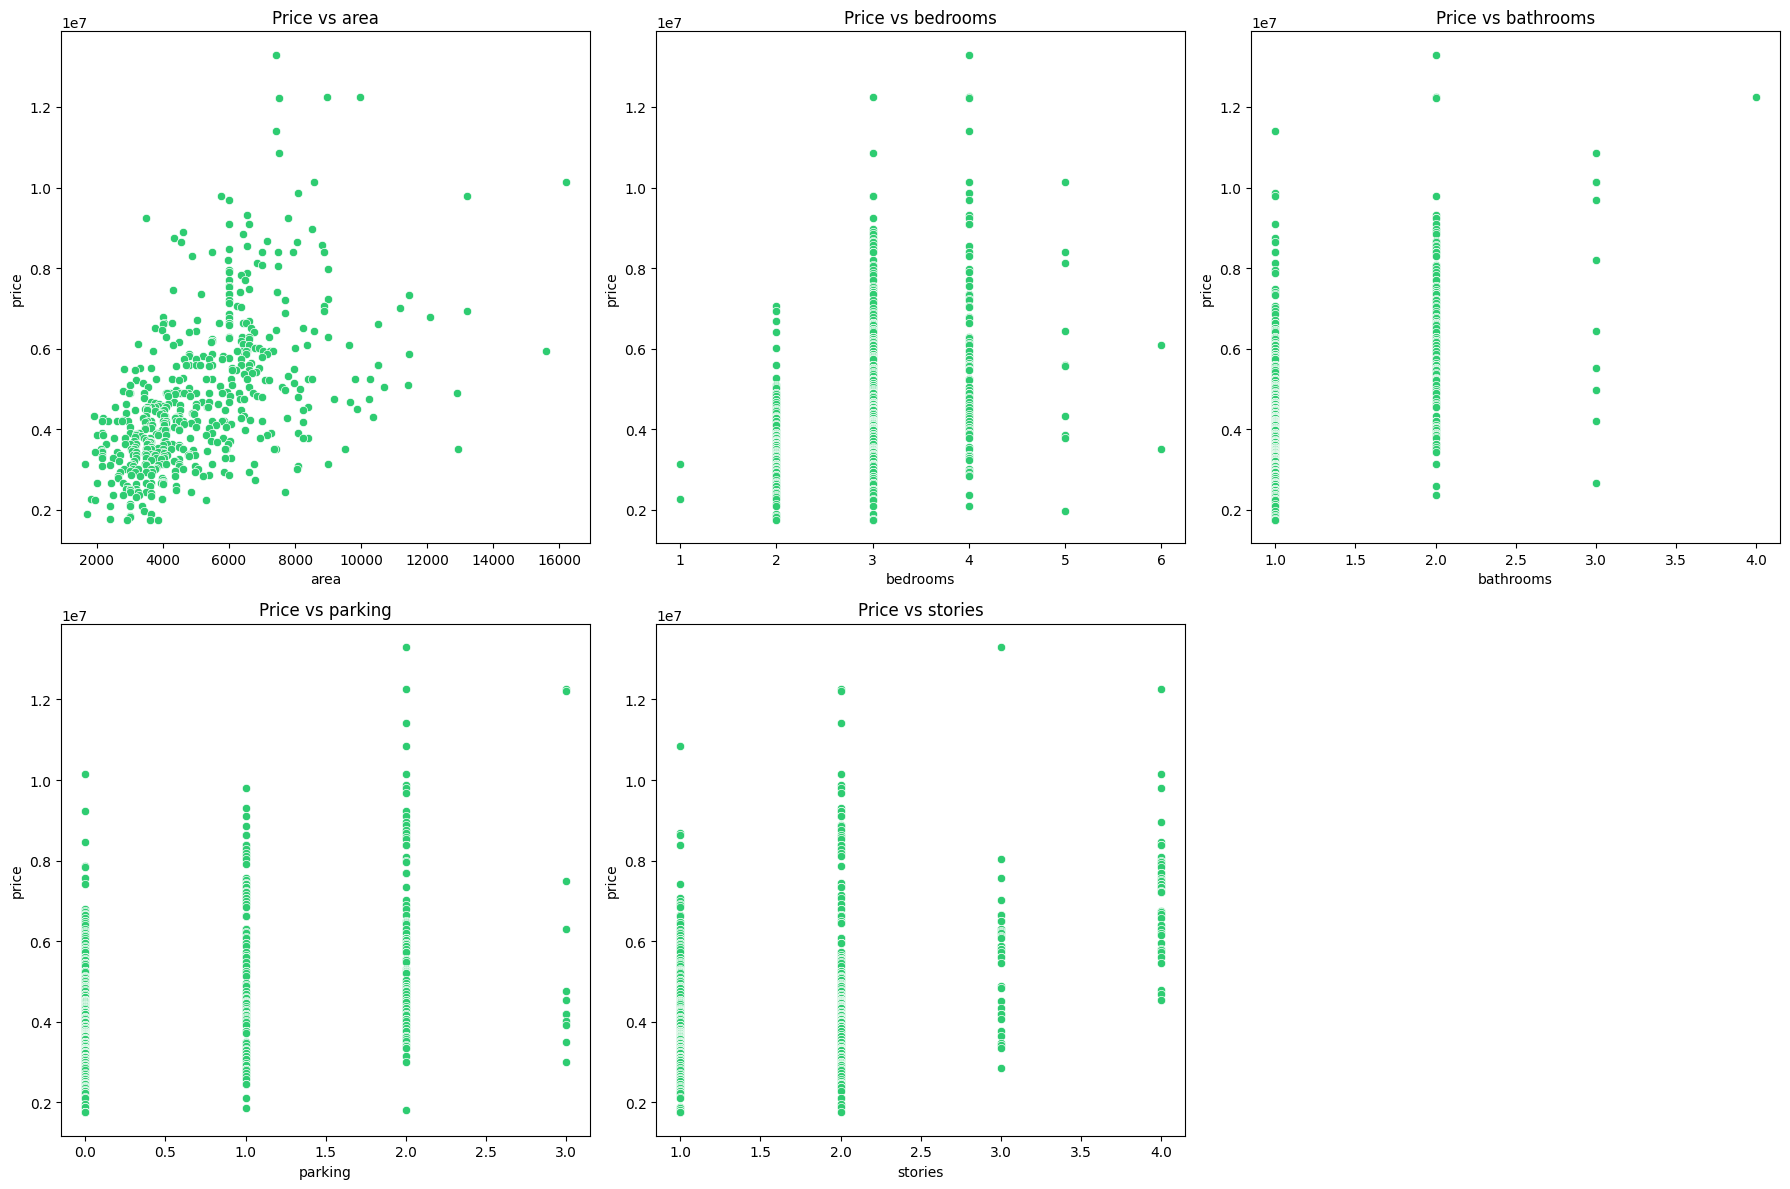

In [13]:
# ===============================
# ANÁLISE EXPLORATÓRIA COMPLETA (EDA)
# ===============================

# Visualização inicial
df.head()
df.info()
df.describe()

# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isna().sum())

# ===============================
# DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
# ===============================
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'parking', 'stories']

plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=20, color="#3D50C3")
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# ===============================
# BOXPLOTS PARA DETECTAR OUTLIERS
# ===============================
plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col], color="#F39C12")
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# ===============================
# CORRELAÇÃO ENTRE VARIÁVEIS
# ===============================
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# ===============================
# TESTE DE HIPÓTESE: PEARSON
# ===============================
# H0: Não há correlação entre variáveis
# H1: Existe correlação significativa
print("Teste de correlação de Pearson:")
for col in num_cols[1:]:
    r, p = sts.pearsonr(df[col], df['price'])
    print(f"{col} vs price: r={r:.3f}, p-valor={p:.3e}")
    if p < 0.05:
        print("-> Correlação significativa")
    else:
        print("-> Não significativa")
    print("")

# ===============================
# SCATTERPLOTS (PRICE VS CADA VARIÁVEL)
# ===============================
plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols[1:], 1):
    plt.subplot(2,3,i)
    sns.scatterplot(data=df, x=col, y='price', color="#2ECC71")
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()


# Regressão Linear Simples (price ~ area)

Nesta etapa ajustamos um modelo linear para prever o preço apenas pela área.
A correlação de Pearson indicou uma relação positiva e consistente entre as variáveis, mostrando que imóveis maiores tendem a ter preços mais altos.
O coeficiente angular do modelo mostrou que a área exerce impacto direto no preço, como esperado, embora não seja o único fator relevante.

Apesar disso, as métricas de erro e o R² revelaram que a área, sozinha, explica apenas uma parte da variação do preço, indicando que outros atributos do imóvel influenciam fortemente o valor final.
Ainda assim, o gráfico reforçou o padrão linear e a análise dos resíduos mostrou comportamento razoavelmente aleatório, sugerindo que a forma linear é adequada para representar a tendência geral dessa relação.


Correlação Pearson: r=0.536 | p=0.00000
Intercepto (β0): 2512254.2639593435
Coeficiente (β1): 425.72984193878284
MAE=1474748.13 | RMSE=1917103.70 | R²=0.273


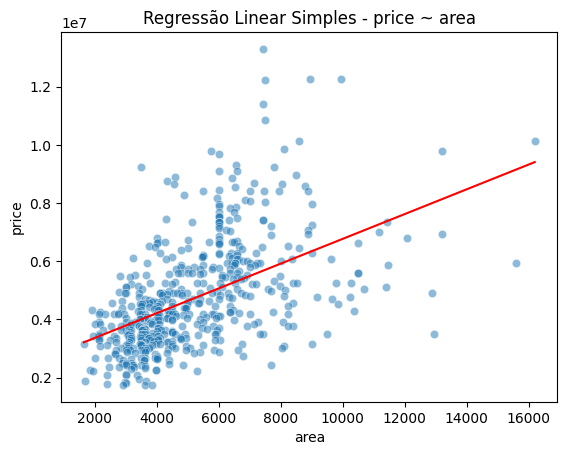

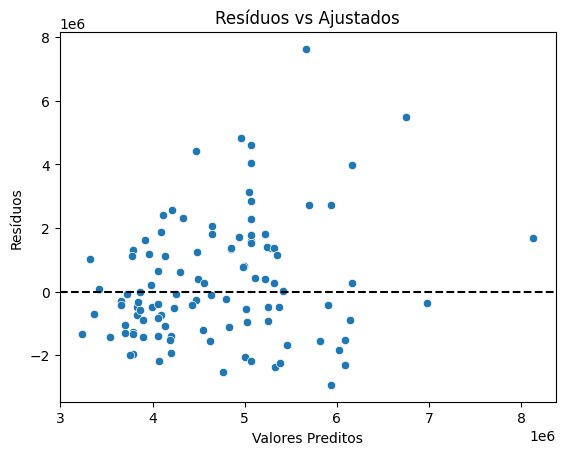

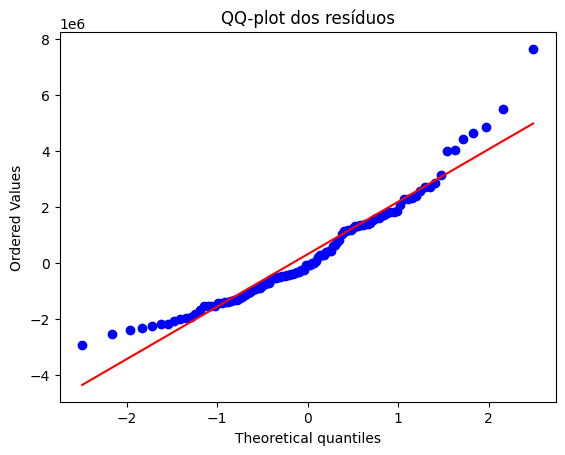

In [14]:
# Correlação de Pearson
r, p = sts.pearsonr(df["area"], df["price"])
print(f"Correlação Pearson: r={r:.3f} | p={p:.5f}")

# Divisão treino/teste
X = df[["area"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ajuste do modelo
lin = LinearRegression()
lin.fit(X_train, y_train)

print("Intercepto (β0):", lin.intercept_)
print("Coeficiente (β1):", lin.coef_[0])

# Predições
y_pred = lin.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")

# Gráfico da regressão
sns.scatterplot(data=df, x="area", y="price", alpha=0.5)
x_line = np.linspace(df["area"].min(), df["area"].max(), 200)
y_line = lin.intercept_ + lin.coef_[0] * x_line
plt.plot(x_line, y_line, color="red")
plt.title("Regressão Linear Simples - price ~ area")
plt.show()

# Resíduos
resid = y_test - y_pred

plt.figure()
sns.scatterplot(x=y_pred, y=resid)
plt.axhline(0, ls="--", color="black")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados")
plt.show()

# QQ-plot dos resíduos
import scipy.stats as prob
prob.probplot(resid, dist="norm", plot=plt)
plt.title("QQ-plot dos resíduos")
plt.show()


# Regressão Linear Múltipla

Nesta etapa ajustamos um modelo linear utilizando múltiplas variáveis preditoras para explicar o preço dos imóveis. A inclusão de mais atributos permitiu capturar melhor a variação do preço em relação às características do imóvel, resultando em métricas superiores às obtidas na regressão simples.

O modelo apresentou melhoria no ajuste e redução dos erros, indicando que variáveis como número de quartos, banheiros e vagas complementam a área e contribuem para uma previsão mais consistente. A análise dos resíduos e o QQ-plot mostraram um comportamento mais adequado, reforçando que o uso de múltiplos atributos melhora o desempenho do modelo linear.

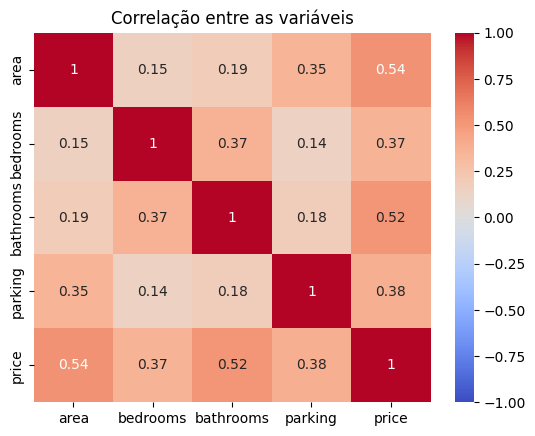

### Treino ###
MAE: 922399.2699224798
RMSE: 1222728.1855495821
R²: 0.5151235935636338

### Teste ###
MAE: 1245976.2469755048
RMSE: 1615033.6809374222
R²: 0.4839652703529478


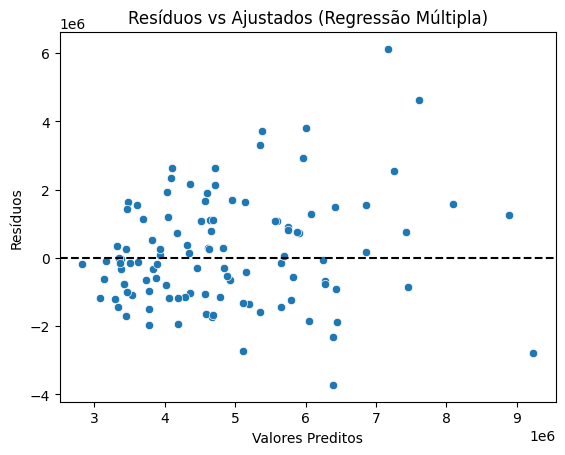

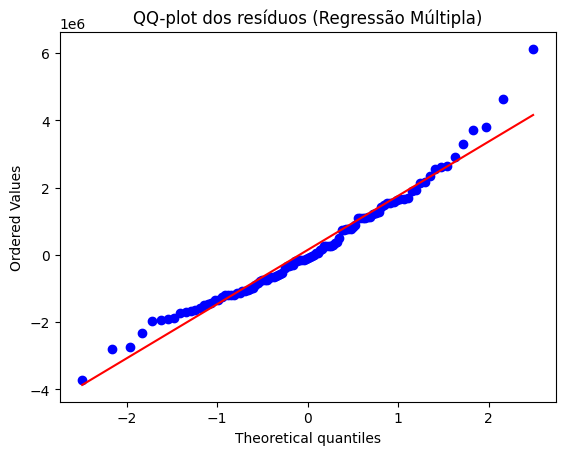

In [15]:
# REGRESSÃO LINEAR MÚLTIPLA

# Selecionando variáveis numéricas
features = ["area", "bedrooms", "bathrooms", "parking"]
X = df[features]
y = df["price"]

# Correlação entre todas as variáveis
sns.heatmap(df[features + ["price"]].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlação entre as variáveis")
plt.show()

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo com padronização
pipe_multi = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

pipe_multi.fit(X_train, y_train)

# Predições
y_train_pred = pipe_multi.predict(X_train)
y_test_pred = pipe_multi.predict(X_test)

# Métricas
print("### Treino ###")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", root_mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\n### Teste ###")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", root_mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

# Gráfico de resíduos
resid = y_test - y_test_pred

plt.figure()
sns.scatterplot(x=y_test_pred, y=resid)
plt.axhline(0, ls="--", color="black")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados (Regressão Múltipla)")
plt.show()

# QQ-plot dos resíduos
import scipy.stats as prob
prob.probplot(resid, dist="norm", plot=plt)
plt.title("QQ-plot dos resíduos (Regressão Múltipla)")
plt.show()


# Regressão Polinomial

A regressão polinomial foi aplicada com o objetivo de verificar se a relação entre área e preço apresentava algum comportamento não linear que pudesse ser melhor capturado por termos quadráticos ou cúbicos. Essa técnica expande o modelo linear tradicional ao incluir novas combinações da variável, permitindo representar curvaturas nos dados.

No entanto, os modelos de grau 2 e grau 3 não apresentaram melhora significativa em relação à regressão linear simples. As métricas permaneceram muito próximas, indicando que a inclusão de termos polinomiais não aumentou substancialmente o poder preditivo. Visualmente, as curvas polinomiais também não evidenciaram padrões relevantes além do que a tendência linear já mostrava.

Esses resultados sugerem que a relação entre área e preço não possui um comportamento curvilíneo forte, e que a principal limitação do modelo está na ausência de atributos mais influentes, como localização, padrão de construção ou idade do imóvel, e não na forma funcional da relação entre as variáveis.

### POLINOMIAL GRAU 2 ###
MAE: 1435042.809916564
RMSE: 1887327.300395345
R²: 0.29529036788381513

### POLINOMIAL GRAU 3 ###
MAE: 1431411.2405259924
RMSE: 1887801.199119451
R²: 0.2949364251167631


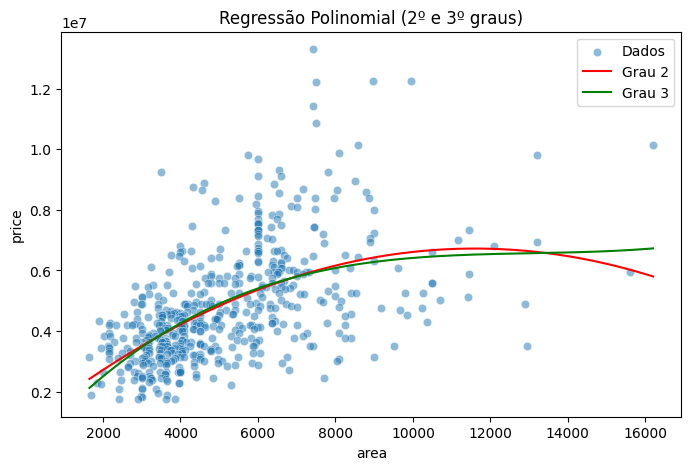

In [16]:
# REGRESSÃO POLINOMIAL (price ~ area)

# Seleção da variável
X = df[["area"]]
y = df["price"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criando pipeline para grau 2
poly2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

poly2.fit(X_train, y_train)
y_pred2 = poly2.predict(X_test)

print("### POLINOMIAL GRAU 2 ###")
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("RMSE:", root_mean_squared_error(y_test, y_pred2))
print("R²:", r2_score(y_test, y_pred2))

# Criando pipeline para grau 3
poly3 = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

poly3.fit(X_train, y_train)
y_pred3 = poly3.predict(X_test)

print("\n### POLINOMIAL GRAU 3 ###")
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("RMSE:", root_mean_squared_error(y_test, y_pred3))
print("R²:", r2_score(y_test, y_pred3))


# Plotando as curvas polinomiais
plt.figure(figsize=(8,5))
sns.scatterplot(x=X["area"], y=y, alpha=0.5, label="Dados")

# Gera curva suave
x_plot = np.linspace(X["area"].min(), X["area"].max(), 300).reshape(-1, 1)

plt.plot(x_plot, poly2.predict(x_plot), color="red", label="Grau 2")
plt.plot(x_plot, poly3.predict(x_plot), color="green", label="Grau 3")

plt.title("Regressão Polinomial (2º e 3º graus)")
plt.legend()
plt.show()


# Criação das Classes de Preço

Para aplicar algoritmos de classificação, o preço, que originalmente é uma variável contínua, foi transformado em faixas categóricas. Utilizamos tercis para dividir o preço em três grupos de igual quantidade: **baixo**, **médio** e **alto**. Essa abordagem facilita o treinamento dos modelos classificatórios e mantém o balanceamento das classes.

In [17]:
# Criando faixas de preço (baixo, médio, alto) usando tercis
df["price_class"] = pd.qcut(
    df["price"],
    q=3,
    labels=["baixo", "medio", "alto"]
)

# Mostrando distribuição das classes
df["price_class"].value_counts()


,count
price_class,
baixo,186
alto,182
medio,177


In [18]:
# Convertendo classes para números (necessário para alguns modelos)
df["price_class_encoded"] = df["price_class"].map({
    "baixo": 0,
    "medio": 1,
    "alto": 2
})

df[["price", "price_class", "price_class_encoded"]].head()


,price,price_class,price_class_encoded
0,13300000,alto,2
1,12250000,alto,2
2,12250000,alto,2
3,12215000,alto,2
4,11410000,alto,2


# Classificação com Regressão Logística

Após categorizar o preço dos imóveis em três faixas, aplicamos a Regressão Logística para prever a classe de cada observação. O modelo utilizou como variáveis preditoras as características estruturais do imóvel. A padronização foi incluída para estabilizar o processo de treinamento. A avaliação foi realizada por meio da acurácia, matriz de confusão e métricas de precisão, recall e F1-score.


Acurácia: 0.6238532110091743

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.32      0.46      0.38        26
           2       0.81      0.66      0.72        44

    accuracy                           0.62       109
   macro avg       0.63      0.60      0.61       109
weighted avg       0.67      0.62      0.64       109


Matriz de Confusão:
[[27 11  1]
 [ 8 12  6]
 [ 1 14 29]]


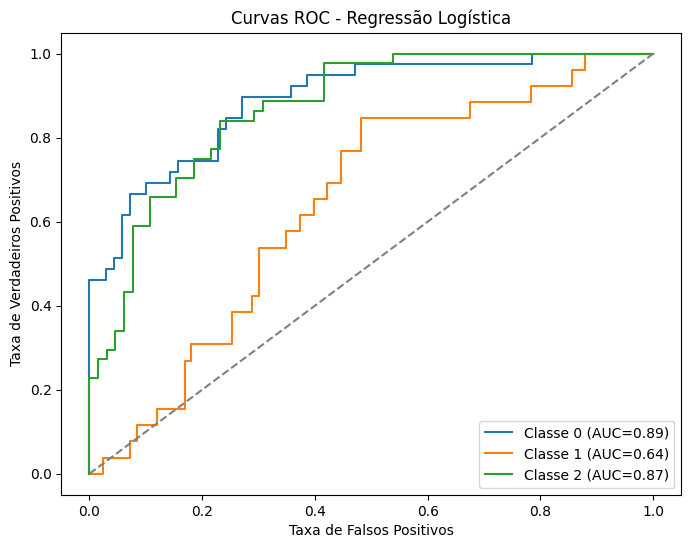

In [19]:
# Features usadas para classificação
X = df[["area", "bedrooms", "bathrooms", "parking"]]
y = df["price_class_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression(max_iter=1000))
])

pipe_log.fit(X_train, y_train)

# Predições
y_pred = pipe_log.predict(X_test)
y_prob = pipe_log.predict_proba(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Necessário para ROC multiclasse (0,1,2)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], ls="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC - Regressão Logística")
plt.legend()
plt.show()


# Classificação com Naive Bayes

O algoritmo Naive Bayes foi aplicado como alternativa à Regressão Logística. Ele assume independência entre os atributos e funciona bem em cenários com múltiplas classes. Utilizamos o GaussianNB por se tratar de variáveis contínuas. A comparação entre os modelos permitiu avaliar diferenças no desempenho preditivo e na capacidade de separação das classes.

Acurácia: 0.6605504587155964

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        39
           1       0.48      0.42      0.45        26
           2       0.78      0.64      0.70        44

    accuracy                           0.66       109
   macro avg       0.64      0.64      0.63       109
weighted avg       0.66      0.66      0.65       109


Matriz de Confusão:
[[33  4  2]
 [ 9 11  6]
 [ 8  8 28]]


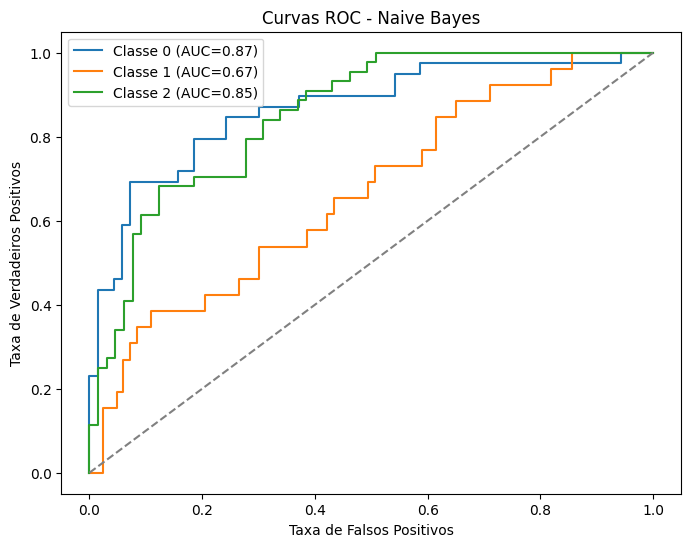

In [20]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

# Predições
y_pred_nb = modelo_nb.predict(X_test)
y_prob_nb = modelo_nb.predict_proba(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_nb))

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_nb[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_nb[:, i])
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC={auc:.2f})")

plt.plot([0,1],[0,1], ls="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC - Naive Bayes")
plt.legend()
plt.show()


# Validação Cruzada (Cross-Validation)

Nesta etapa avaliamos a estabilidade do modelo utilizando validação cruzada com 5 folds.  
Esse processo divide o conjunto de dados em diferentes partes para treinar e testar o modelo várias vezes, reduzindo a influência da divisão aleatória.

A acurácia média representa o desempenho geral, enquanto o desvio padrão indica a variação entre as execuções.  
Resultados com baixa variação sugerem que o modelo é estável e generaliza bem.

In [21]:
### CROSS-VALIDATION (VALIDAÇÃO CRUZADA) ###

# Usaremos o modelo final escolhido (classificação) – GaussianNB
modelo_cv = GaussianNB()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    modelo_cv,
    X,  # todo o dataset
    y.values.ravel(),
    cv=kfold,
    scoring='accuracy'
)

print("### Validação Cruzada (5-fold) ###")
print(f"Acurácia média: {scores.mean():.4f}")
print(f"Desvio padrão: {scores.std():.4f}")
print("\nScores individuais:", scores)


### Validação Cruzada (5-fold) ###
Acurácia média: 0.5982
Desvio padrão: 0.0564

Scores individuais: [0.66055046 0.66055046 0.56880734 0.58715596 0.51376147]


# Comparação entre Modelos de Classificação

Testamos diferentes algoritmos de classificação para prever a categoria de preço dos imóveis.  
Os modelos avaliados foram:

- Regressão Logística  
- Naive Bayes  
- KNN  
- Random Forest  
- SVM linear  

Para cada modelo foram medidas a **Acurácia** e o **F1-Score**, permitindo avaliar tanto o desempenho geral quanto o equilíbrio entre precisão e recall.

A matriz de confusão do melhor modelo foi gerada para analisar os erros específicos entre as classes.

Essa comparação permite identificar qual algoritmo generaliza melhor para o problema, servindo de base para a etapa seguinte de otimização (GridSearch ou RandomizedSearch).


Melhor modelo: Regressão Logística


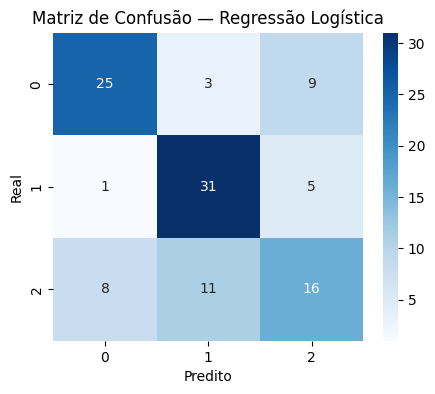

In [26]:
### PREPARAÇÃO DO CONJUNTO DE CLASSIFICAÇÃO (somente variáveis numéricas) ###

df["price_class"] = df["price_class"].astype(str)

X_cls = df.select_dtypes(include=["int64", "float64"]).drop(columns=["price"])
y_cls = df["price_class"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", LinearSVC())
    ])
}

### FUNÇÃO DE AVALIAÇÃO ###

def avaliar_modelo(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1  = classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"]

    return acc, f1

### LOOP DE COMPARAÇÃO ###

resultados = []

for nome, modelo in modelos.items():
    acc, f1 = avaliar_modelo(modelo, X_train_c, y_train_c, X_test_c, y_test_c)
    resultados.append([nome, acc, f1])

df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Acurácia", "F1-Score"])
df_resultados.sort_values(by="F1-Score", ascending=False)

### MATRIZ DE CONFUSÃO DO MELHOR MODELO ###

melhor = df_resultados.sort_values(by="F1-Score", ascending=False).iloc[0]["Modelo"]
print(f"Melhor modelo: {melhor}")

modelo_final = modelos[melhor]
modelo_final.fit(X_train_c, y_train_c)
y_pred_final = modelo_final.predict(X_test_c)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_final), annot=True, cmap="Blues")
plt.title(f"Matriz de Confusão — {melhor}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()